# Dwelling type and mental health

This script prepares the master data frame for analysis by dwelling type and then conducts that analysis.

Summary:  
* No correlation was found between the prevalence of a dwelling type in a postcode and the prevalence of mental health conditions in that postcode.

### Data preparation

In [15]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Read master postcodes list and postcodes lat/long csv
path = "Output/master_data.csv"
df = pd.read_csv(path)


In [17]:
# Remove Postcodes with less than 10000 people
filtered_df = df.loc[(df["Total People"] > 10000), :]
filtered_df

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,6 or more bedrooms,Couple with no children,Couple with children,One parent with children,Other family,Sole person household,Group household,People with Mental Health Conditions,Total People,State
1,810,14828,2642,5649,85,207,1768,8552,9360,5484,...,311,6553,8881,2893,425,6996,1737,1971,34330,7: Northern Territory
2,812,9601,1127,1549,134,67,448,3389,6590,2353,...,95,3237,4486,2032,204,3249,592,1076,18634,7: Northern Territory
3,820,4926,3337,6733,104,167,1463,7566,7580,2372,...,168,5792,4755,1644,220,5987,1843,1112,19920,7: Northern Territory
4,822,9415,655,168,348,216,873,3083,4392,1811,...,183,2456,4369,1989,404,1921,268,755,25304,7: Northern Territory
7,830,9542,905,1888,16,25,805,2765,6391,2944,...,90,3080,4275,2193,157,3537,566,1302,18501,7: Northern Territory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,116,2567,10629,19927,8506,...,321,12187,10649,5302,400,14883,1537,5821,51133,6: Tasmania
2626,7307,8732,485,64,96,36,317,2029,5101,1720,...,52,3468,2268,928,93,2762,196,1153,11849,6: Tasmania
2627,7310,20651,2473,52,208,87,1244,5300,12894,3844,...,166,7001,5360,3261,245,8145,755,3536,28635,6: Tasmania
2628,7315,11357,1178,47,203,31,725,2753,6894,2374,...,65,4191,2983,1592,117,4439,238,1658,15635,6: Tasmania


In [18]:
# Create calculated column for % of people in each postcode with Mental Health Conditions
filtered_df["Mental Health (%)"] = round(filtered_df["People with Mental Health Conditions"] / filtered_df["Total People"] * 100, 3)
filtered_df

,Postcode,House,Semi-detached,Apartment,Other dwelling,"No bedrooms (studios, etc)",1 bedroom,2 bedrooms,3 bedrooms,4 bedrooms,...,Couple with no children,Couple with children,One parent with children,Other family,Sole person household,Group household,People with Mental Health Conditions,Total People,State,Mental Health (%)
1,810,14828,2642,5649,85,207,1768,8552,9360,5484,...,6553,8881,2893,425,6996,1737,1971,34330,7: Northern Territory,5.741
2,812,9601,1127,1549,134,67,448,3389,6590,2353,...,3237,4486,2032,204,3249,592,1076,18634,7: Northern Territory,5.774
3,820,4926,3337,6733,104,167,1463,7566,7580,2372,...,5792,4755,1644,220,5987,1843,1112,19920,7: Northern Territory,5.582
4,822,9415,655,168,348,216,873,3083,4392,1811,...,2456,4369,1989,404,1921,268,755,25304,7: Northern Territory,2.984
7,830,9542,905,1888,16,25,805,2765,6391,2944,...,3080,4275,2193,157,3537,566,1302,18501,7: Northern Territory,7.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,116,2567,10629,19927,8506,...,12187,10649,5302,400,14883,1537,5821,51133,6: Tasmania,11.384
2626,7307,8732,485,64,96,36,317,2029,5101,1720,...,3468,2268,928,93,2762,196,1153,11849,6: Tasmania,9.731
2627,7310,20651,2473,52,208,87,1244,5300,12894,3844,...,7001,5360,3261,245,8145,755,3536,28635,6: Tasmania,12.349
2628,7315,11357,1178,47,203,31,725,2753,6894,2374,...,4191,2983,1592,117,4439,238,1658,15635,6: Tasmania,10.604


### Normal distribution of data

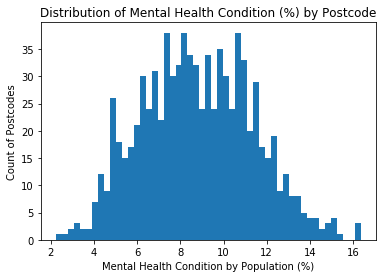

<Figure size 432x288 with 0 Axes>

In [88]:
# Check if mental heatlh condition data is normally distributed
data = filtered_df["Mental Health (%)"]
plt.hist(data, bins=51)
plt.xlabel("Mental Health Condition by Population (%)")
plt.ylabel("Count of Postcodes")
plt.title("Distribution of Mental Health Condition (%) by Postcode")

plt.show()
plt.savefig(f"Output/normalised_data.png")


In [20]:
# Filter master dataframe to columns relevant to dwelling type
filtered_df["Sum of Dwelling Type"] = filtered_df['House'] + filtered_df['Semi-detached'] + filtered_df['Apartment'] + filtered_df['Other dwelling']
dwelling_df = filtered_df[["Postcode", "House", "Semi-detached", "Apartment", "Other dwelling", "Sum of Dwelling Type", "Mental Health (%)", "State"]]
dwelling_df


,Postcode,House,Semi-detached,Apartment,Other dwelling,Sum of Dwelling Type,Mental Health (%),State
1,810,14828,2642,5649,85,23204,5.741,7: Northern Territory
2,812,9601,1127,1549,134,12411,5.774,7: Northern Territory
3,820,4926,3337,6733,104,15100,5.582,7: Northern Territory
4,822,9415,655,168,348,10586,2.984,7: Northern Territory
7,830,9542,905,1888,16,12351,7.037,7: Northern Territory
...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,41147,11.384,6: Tasmania
2626,7307,8732,485,64,96,9377,9.731,6: Tasmania
2627,7310,20651,2473,52,208,23384,12.349,6: Tasmania
2628,7315,11357,1178,47,203,12785,10.604,6: Tasmania


### Analysis of dwelling type vs mental health (%)

In [21]:
# Create calculated columns - % for each dwelling type
dwelling_df["house%"] = round((dwelling_df["House"]/dwelling_df["Sum of Dwelling Type"]) * 100, 3)
dwelling_df["semidetached%"] = round((dwelling_df["Semi-detached"]/dwelling_df["Sum of Dwelling Type"]) * 100, 3)
dwelling_df["apartment%"] = round((dwelling_df["Apartment"]/dwelling_df["Sum of Dwelling Type"]) * 100, 3)
dwelling_df["other%"] = round((dwelling_df["Other dwelling"]/dwelling_df["Sum of Dwelling Type"]) * 100, 3)
dwelling_df

,Postcode,House,Semi-detached,Apartment,Other dwelling,Sum of Dwelling Type,Mental Health (%),State,house%,semidetached%,apartment%,other%
1,810,14828,2642,5649,85,23204,5.741,7: Northern Territory,63.903,11.386,24.345,0.366
2,812,9601,1127,1549,134,12411,5.774,7: Northern Territory,77.359,9.081,12.481,1.080
3,820,4926,3337,6733,104,15100,5.582,7: Northern Territory,32.623,22.099,44.589,0.689
4,822,9415,655,168,348,10586,2.984,7: Northern Territory,88.938,6.187,1.587,3.287
7,830,9542,905,1888,16,12351,7.037,7: Northern Territory,77.257,7.327,15.286,0.130
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,7250,33651,3152,4202,142,41147,11.384,6: Tasmania,81.782,7.660,10.212,0.345
2626,7307,8732,485,64,96,9377,9.731,6: Tasmania,93.121,5.172,0.683,1.024
2627,7310,20651,2473,52,208,23384,12.349,6: Tasmania,88.313,10.576,0.222,0.889
2628,7315,11357,1178,47,203,12785,10.604,6: Tasmania,88.831,9.214,0.368,1.588


In [84]:
# Definition of scattergraph / linear regression / correlation function.
def plt_linreg(x,y,x_name,y_name,pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = "SteelBlue", edgecolors= "black")
    plt.plot(x,regress_values, color = "red", alpha=0.8)
    plt.annotate(f"Linear regression:\n{line_eq}",pos,fontsize=12,color="red", alpha=0.8) 
    plt.title(f"{x_name} by Prevalence of\n{y_name}s in the Postcode")
    plt.xlabel("Mental Health Conditions (%)")
    plt.ylabel(f"{y_name}s as a (%) of Dwelling Types")
    plt.ylim(0,100)
    plt.show()
    #print(f"The linear regression equation for these factors is:\n{line_eq}\n")
    correlation = st.pearsonr(x,y)
    if correlation[0] > 0:
        correlation_direction = "positive"
    else:
        correlation_direction = "negative"
    if abs(correlation[0]) < 0.3:
        correlation_type = "no correlation"
    elif abs(correlation[0]) < 0.5:
        correlation_type = f"a weak {correlation_direction} correlation"
    elif abs(correlation[0]) < 0.7:
        correlation_type = f"a moderate {correlation_direction} correlation"
    else:
        correlation_type = f"a strong {correlation_direction} correlation"
    print(f"The correlation coefficient for these factors is {round(correlation[0],2)}")
    print(f"This indicates {correlation_type} between these factors.")
    plt.savefig(f"Output/{y.name}.png")

#### Dwelling type: house

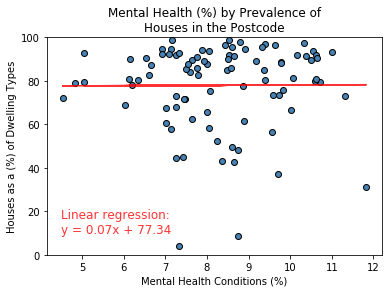

The correlation coefficient for these factors is 0.01
This indicates no correlation between these factors.


<Figure size 432x288 with 0 Axes>

In [85]:
plt_linreg(dwelling_df["Mental Health (%)"],dwelling_df["house%"],"Mental Health (%)","House",(4.5,10))


#### Dwelling Type: semi-detached

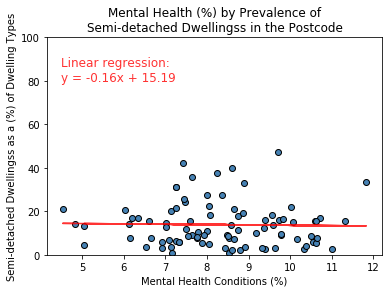

The correlation coefficient for these factors is -0.02
This indicates no correlation between these factors.


<Figure size 432x288 with 0 Axes>

In [86]:
plt_linreg(dwelling_df["Mental Health (%)"],dwelling_df["semidetached%"],"Mental Health (%)","Semi-detached Dwellings", (4.5,80))

#### Dwelling Type: apartment

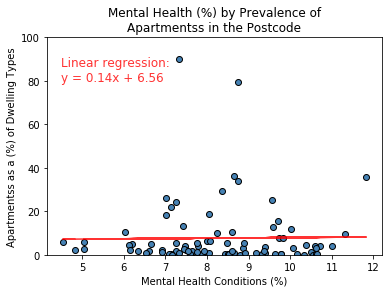

The correlation coefficient for these factors is 0.01
This indicates no correlation between these factors.


<Figure size 432x288 with 0 Axes>

In [87]:
plt_linreg(dwelling_df["Mental Health (%)"],dwelling_df["apartment%"],"Mental Health (%)","Apartments", (4.5,80))